In [3]:
pip install Biopython

In [2]:
from Bio import SeqIO
import pandas as pd

# IMPORT THE FIRST DATASET 
# Replace 'your_fasta_file.fasta' with the actual filename
fasta_file = 'train_AMP_3268.fasta'

# Parse the FASTA file and create a list of dictionaries
fasta_data = []
for record in SeqIO.parse(fasta_file, 'fasta'):
    fasta_data.append({
        'ID': record.id,
        'Description': record.description,
        'Sequence': str(record.seq),
    })

# Convert the list of dictionaries to a DataFrame
Anti_df = pd.DataFrame(fasta_data)

# add a label to the antimicrobial peptide
Anti_df["Label"] = "Antimicrobial"

# Display the DataFrame
Anti_df.head()


,ID,Description,Sequence,Label
0,AMP_1,AMP_1,AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC,Antimicrobial
1,AMP_2,AMP_2,AAEFPDFYDSEEQMGPHQEAEDEKDRADQRVLTEEEKKELENLAAM...,Antimicrobial
2,AMP_3,AMP_3,AAFFAQQKGLPTQQQNQVSPKAVSMIVNLEGCVRNPYKCPADVWTN...,Antimicrobial
3,AMP_4,AMP_4,AAFRGCWTKNYSPKPCL,Antimicrobial
4,AMP_5,AMP_5,AAGMGFFGAR,Antimicrobial


In [3]:
Anti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           3268 non-null   object
 1   Description  3268 non-null   object
 2   Sequence     3268 non-null   object
 3   Label        3268 non-null   object
dtypes: object(4)
memory usage: 102.3+ KB


In [4]:
# Replace 'your_fasta_file.fasta' with the actual filename
fasta_file = 'train_nonAMP_9777.fasta'

# Parse the FASTA file and create a list of dictionaries
fasta_data = []
for record in SeqIO.parse(fasta_file, 'fasta'):
    fasta_data.append({
        'ID': record.id,
        'Description': record.description,
        'Sequence': str(record.seq),
    })

# Convert the list of dictionaries to a DataFrame
non_Anti_df = pd.DataFrame(fasta_data)

# add a label to the antimicrobial peptide
non_Anti_df["Label"] = "Non-Antimicrobial"

# Display the DataFrame
print(non_Anti_df.head())


         ID Description                                           Sequence  \
0  nonamp_1    nonamp_1  MNNNTTAPTYTLRGLQLIGWRDMQHALDYLFADGHLKQGTLVAINA...   
1  nonamp_2    nonamp_2  MKSLLPLAILAALAVAALCYESHESMESYEVSPFTTRRNANTFISP...   
2  nonamp_3    nonamp_3  MASVTDGKTGIKDASDQNFDYMFKLLIIGNSSVGKTSFLFRYADDT...   
3  nonamp_4    nonamp_4  MASFQDRAQHTIAQLDKELSKYPVLNNLERQTSVPKVYVILGLVGI...   
4  nonamp_5    nonamp_5  MRHRSGLRKLNRTSSHRQAMFRNMANSLLRHEVIKTTLPKAKELRR...   

               Label  
0  Non-Antimicrobial  
1  Non-Antimicrobial  
2  Non-Antimicrobial  
3  Non-Antimicrobial  
4  Non-Antimicrobial  


In [5]:
non_Anti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9777 entries, 0 to 9776
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           9777 non-null   object
 1   Description  9777 non-null   object
 2   Sequence     9777 non-null   object
 3   Label        9777 non-null   object
dtypes: object(4)
memory usage: 305.7+ KB


In [6]:
merged_df = pd.concat([Anti_df, non_Anti_df])


In [7]:
merged_df.reset_index(drop= True, inplace= True)

In [8]:
merged_df.head()

,ID,Description,Sequence,Label
0,AMP_1,AMP_1,AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC,Antimicrobial
1,AMP_2,AMP_2,AAEFPDFYDSEEQMGPHQEAEDEKDRADQRVLTEEEKKELENLAAM...,Antimicrobial
2,AMP_3,AMP_3,AAFFAQQKGLPTQQQNQVSPKAVSMIVNLEGCVRNPYKCPADVWTN...,Antimicrobial
3,AMP_4,AMP_4,AAFRGCWTKNYSPKPCL,Antimicrobial
4,AMP_5,AMP_5,AAGMGFFGAR,Antimicrobial


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13045 entries, 0 to 13044
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           13045 non-null  object
 1   Description  13045 non-null  object
 2   Sequence     13045 non-null  object
 3   Label        13045 non-null  object
dtypes: object(4)
memory usage: 407.8+ KB


In [10]:
merged_df['Label'].value_counts()

Non-Antimicrobial    9777
Antimicrobial        3268
Name: Label, dtype: int64

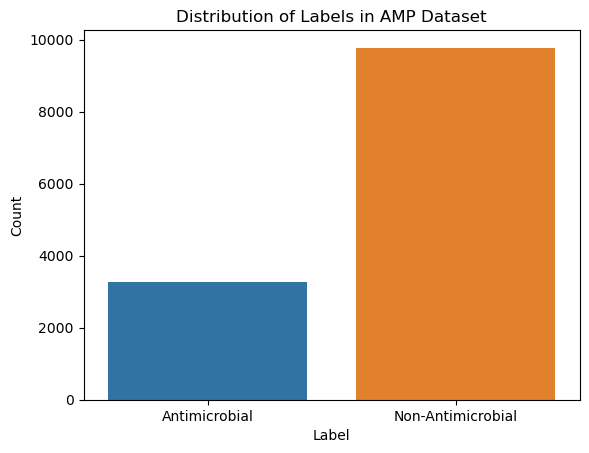

In [14]:
# Bar chart of the value count of `Label` column
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=merged_df)
plt.title('Distribution of Labels in AMP Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [9]:
merged_df.to_csv("AMP.csv")

In [11]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Extract sequences
# Convert sequences to k-mer counts
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))  # Adjust k-mer size as needed
X_features = vectorizer.fit_transform(merged_df['Sequence'])

# Display feature names (k-mers)
feature_names = vectorizer.get_feature_names_out()
print("Feature names (k-mers):", feature_names)

# Display the extracted features
print("Extracted features:")
print(X_features.toarray())


Feature names (k-mers): ['a' 'aa' 'aaa' ... 'yyv' 'yyw' 'yyy']
Extracted features:
[[ 4  1  0 ...  0  0  0]
 [ 7  2  0 ...  0  0  0]
 [15  2  0 ...  0  0  0]
 ...
 [ 7  0  0 ...  0  0  0]
 [ 4  0  0 ...  0  0  0]
 [ 8  0  0 ...  0  0  0]]


In [12]:
X = X_features
y = merged_df['Label']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [15]:
pred = clf.predict(X_test)

In [16]:
pred

array(['Non-Antimicrobial', 'Antimicrobial', 'Antimicrobial', ...,
       'Non-Antimicrobial', 'Non-Antimicrobial', 'Antimicrobial'],
      dtype=object)

In [17]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9490226140283634
Classification Report:
                    precision    recall  f1-score   support

    Antimicrobial       0.89      0.91      0.90       671
Non-Antimicrobial       0.97      0.96      0.97      1938

         accuracy                           0.95      2609
        macro avg       0.93      0.94      0.93      2609
     weighted avg       0.95      0.95      0.95      2609



In [18]:
new_sequence = ["DFLKKGLKKSLG"]
new_sequence_vectorized = vectorizer.transform(new_sequence)
prediction = clf.predict(new_sequence_vectorized)


In [19]:
prediction

array(['Antimicrobial'], dtype=object)